In [1]:
# get recall and precision for dictionary 


In [488]:
p = '/Users/anne/repos/RPA/output/output/f1_scores.json'

with open(p) as handle:
            dictdump = json.loads(handle.read()) 
            
df = pd.DataFrame.from_dict(dictdump).transpose()

In [501]:
df.index

Index(['Macro-economie en belastingen', 'Justitie, Rechtspraak, Criminaliteit',
       'Wetenschappelijk onderzoek, technologie en communicatie',
       'Burgerrechten en vrijheden', 'Onderwijs',
       'Buitenlandse zaken en ontwikkelingssamenwerking', 'Arbeid',
       'Verkeer en vervoer', 'sociale Zaken',
       'Functioneren democratie en openbaar bestuur', 'Energiebeleid',
       'Gezondheid',
       'Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning',
       'Overige', 'Defensie',
       'Ondernemingen, Bankwezen en binnenlandse handel ',
       'Landbouw en Visserij', 'Milieu', 'Immigratie en integratie'],
      dtype='object')

In [550]:
import json
import logging
import pandas as pd

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''This prepares a CNN model and runs it'''

    def __init__(self, path_to_data, path_to_output, sample):
        self.path_to_data = path_to_data
        self.path_to_output = path_to_output
        self.sample = sample
        with open('../resources/topic_translation') as handle:
               self.translator = json.loads(handle.read()) 
        
    def get_data_dictionary(self):
         # getting Dictionary Approach Data
        fname = '{}precision_recall_f1score_dictionary_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname)
        
        with open(fname) as handle:
            dictdump =  json.loads(handle.read()) 
            
        df = pd.DataFrame.from_dict(dictdump).transpose()
        df['classifier'] = 'Albaugh et al. (Dictionary) - stemmed'

        fname_notstemmed = '{}precision_recall_f1score_dictionary_not_stemmed{}.json'.format(self.path_to_data, self.sample)
        logger.info(fname_notstemmed)

        with open(fname_notstemmed) as handle:
            dictdump =  json.loads(handle.read()) 
            
        df2 = pd.DataFrame.from_dict(dictdump).transpose()
        df2['classifier'] = 'Albaugh et al. (Dictionary) - not stemmed'
        
        df = pd.concat([df, df2])
        df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df
    
    def get_data_cnn(self):
        
        '''create if/else for different samples'''
        
        fname_cnn = '{}output/f1_scores.json'.format(self.path_to_data)
        with open(fname_cnn) as handle:
            data =  json.loads(handle.read()) 
        
        df = pd.DataFrame.from_dict(data).transpose()
        df['approach'] = 'CNN'
        df.rename(index=self.translator, inplace=True)
        df.rename(columns={19 : 'f1-score'}, inplace=True)
        df['classifier'] = 'CNN'
        df = df[['f1-score', 'approach', 'classifier']]
        return df

    
    def get_data_sml(self):
        
        '''create if/else for different samples'''
        
        fname_sml = '{}SML_precision_recall_f1score{}.json'.format(self.path_to_data, self.sample)
        with open(fname_sml) as handle:
            class_report =  json.loads(handle.read()) 

        one, two, three = class_report
        one = pd.DataFrame(one).transpose()
        one['classifier'] = "Naive Bayes"
        logging.info("Results Gridsearch Naive Bayes: \n\nAlpha: {} \nNgram_range: {} \n\n."
              .format(one['clf__alpha'][one.index=='best estimators:'] [0] , 
                      one['vect__ngram_range'][one.index=='best estimators:'][0]) ) 

        two = pd.DataFrame(two).transpose()
        two['classifier'] = "Passive Agressive"

        logging.info("Results Gridsearch Passive Agressive: \n\nC: {} \nfit intercept: {} \nmax_iter: {} \nmax_loss: {} \nuse idf: {} \nvec ngram range: {}"
              .format(two['clf__C'][two.index=='best estimators:'] [0] , 
                      two['clf__fit_intercept'][two.index=='best estimators:'][0] , 
                      two['clf__max_iter'][two.index=='best estimators:'] [0] , 
                      two['clf__loss'][two.index=='best estimators:'][0] , 
                      two['tfidf__use_idf'][two.index=='best estimators:'] [0] , 
                      two['vect__ngram_range'][two.index=='best estimators:'][0] )  ) 

        three = pd.DataFrame(three).transpose()
        three['classifier'] = "SGD Classifier"

        logging.info("Results Gridsearch SGD Classifier: \n\nAlpha: {} \nmax iter: {} \npenalty: {} \n\n."
              .format(three['clf__alpha'][one.index=='best estimators:'] [0] , 
                      three['clf__max_iter'][one.index=='best estimators:'][0] , 
                      three['clf__penalty'][one.index=='best estimators:'][0]) ) 


        df_sml = pd.concat([one, two, three])
        df_sml = df_sml[['precision', 'recall', 'f1-score', 'classifier']]
        df_sml.drop(['best estimators:', 'classifier:', 'micro avg', 'macro avg'], inplace = True)
        df_sml['approach'] = 'SML'
        df_sml.rename(index=translator, inplace=True)
        return df_sml

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df3 = self.get_data_cnn()
        df = pd.concat([df1, df2, df3])
        df['Policy topic'] = df.index
        return df

In [552]:
myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='totalsample')
df = myanalyzer.combine_datasets()
df

2019-09-27 22:00:14,862 : INFO : ../output/precision_recall_f1score_dictionary_stemmedtotalsample.json
2019-09-27 22:00:14,868 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmedtotalsample.json
2019-09-27 22:00:14,887 : INFO : Results Gridsearch Naive Bayes: 

Alpha: 0.001 
Ngram_range: [1, 2] 

.
2019-09-27 22:00:14,903 : INFO : Results Gridsearch Passive Agressive: 

C: 1.0 
fit intercept: True 
max_iter: 5 
max_loss: hinge 
use idf: True 
vec ngram range: [1, 1]
2019-09-27 22:00:14,923 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 1e-05 
max iter: 20 
penalty: l2 

.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:98: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Library/Frameworks/Python.framework

,approach,classifier,f1-score,precision,recall,Policy topic
Governmental operations,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.118772,0.455598,0.068287,Governmental operations
Education,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.495105,0.415493,0.612457,Education
Civil rights,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.0493097,0.0484496,0.0502008,Civil rights
Law & crime,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.39031,0.592643,0.29097,Law & crime
"Banking, finance, & commerce",Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.285115,0.451827,0.20827,"Banking, finance, & commerce"
Defense,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.38,0.398323,0.363289,Defense
Health,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.418182,0.59126,0.323488,Health
Community dev. & housing,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.193833,0.709677,0.112245,Community dev. & housing
Transportation,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.34592,0.525926,0.257713,Transportation
Int. affairs & foreign aid,Dictionary Approach,Albaugh et al. (Dictionary) - stemmed,0.119322,0.590604,0.066365,Int. affairs & foreign aid


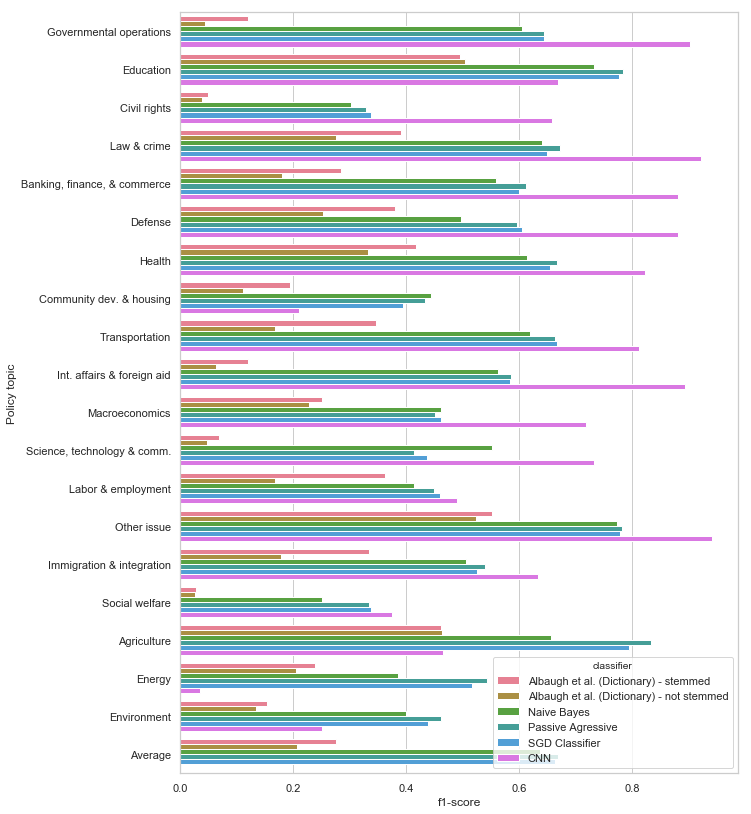

In [575]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,14))
sns.set_context('talk')
sns.set(style="whitegrid")

ax = sns.barplot(y="Policy topic", x= "f1-score", hue = "classifier", palette=("husl"), data=df)

In [343]:
fname = '../output/SML_precision_recall_f1scoreRPA_sample.json'

with open(fname) as handle:
    dictdump =  json.loads(handle.read()) 

In [344]:
df2 = pd.DataFrame.from_dict(dictdump).transpose()

In [421]:
df

,precision,recall,f1-score,Approach
Governmental operations,0.520000,0.022569,0.043261,Dictionary Approach
Education,0.625641,0.422145,0.504132,Dictionary Approach
Civil rights,0.400000,0.020080,0.038241,Dictionary Approach
Law & crime,0.683511,0.171906,0.274719,Dictionary Approach
"Banking, finance, & commerce",0.443114,0.113323,0.180488,Dictionary Approach
Defense,0.353952,0.196941,0.253071,Dictionary Approach
Health,0.558140,0.236287,0.332016,Dictionary Approach
Community dev. & housing,0.631579,0.061224,0.111628,Dictionary Approach
Transportation,0.435115,0.103448,0.167155,Dictionary Approach
Int. affairs & foreign aid,0.637681,0.033183,0.063082,Dictionary Approach


In [320]:
df2 = df2[['precision', 'recall', 'f1-score']]

In [359]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import logging
import json

PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/data/'
FILENAME = 'RPA_and_Buschers_data_with_dictionaryscores.pkl'

OUTPUT_PATH ='../output/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + FILENAME)
    return df

def gridsearch_with_classifiers(sample):

    df = get_data()

    logging.info('getting the data. keeping sample: {}'.format(sample))

    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']

    logging.info('total size df: {}'.format(len(df)))
    X_train , X_test , y_train , y_test = train_test_split (df['text_x'], df['main_topic_label'], test_size = 0.2 , random_state =42)

    class_report = []
    results = []

    names = [
             "Naive Bayes",
             "Passive Agressive",
             "SGDClassifier"
            ]

    classifiers = [
        MultinomialNB(),
        PassiveAggressiveClassifier(),
        SGDClassifier(),
    ]

    parameters = [
                 {'vect__ngram_range': [(1, 1), (1, 2)],
                  'clf__alpha': (1e-2, 1e-3, 1e-5)},

                {

                'clf__loss': ('hinge', 'squared_hinge'),
                'clf__C': (0.01, 0.5, 1.0)   ,
                'clf__fit_intercept': (True, False) ,
                'vect__ngram_range': [(1, 1), (1, 2)] ,
                'tfidf__use_idf' :(True ,False),
                'clf__max_iter': (5 ,10 ,15)

                } ,

                  {'clf__max_iter': (20, 30) ,
                   'clf__alpha': (1e-2, 1e-3, 1e-5),
                   'clf__penalty': ('l2', 'elasticnet')}
                 ]


    for name, classifier, params in zip(names, classifiers, parameters):
        my_dict = {}
        print(name)
        print(classifier)
        print(params)
        clf_pipe = Pipeline([
            ('vect', TfidfVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', classifier),
        ])

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, cv=3)
        logger.info("Starting gridsearch....")
        clf = gs_clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        print("{} score: {}".format(name, score))
        print("{} are the best estimators".format(clf.best_estimator_))

        results_to_dict = classification_report((clf.best_estimator_.predict(X_test)), y_test, output_dict= True)

        results_to_dict['classifier:'] = name
        results_to_dict['best estimators:'] = clf.best_params_

        print("Created dictionary with classification report: \n\n{}".format(results_to_dict))

        y_hats = clf.predict(X_test)

        my_dict = {"predicted": y_hats,
                   "actual" : y_test.values  ,
                    "classifier" : name}

        results.append(my_dict)
        class_report.append(results_to_dict)
        
    return class_report, results
   # results_to_dict = metrics.classification_report((clf.best_estimator_.predict(X_test), y_test), output_dict=True )
    #print(classification_report(, y_pred, target_names=target_names))


In [360]:
def get_scores(sample):
    class_report, results = gridsearch_with_classifiers(sample)
    fname_accuracy = '{}SML_precision_recall_f1score{}.json'.format(OUTPUT_PATH, sample)
    output = pd.DataFrame.from_dict(data)
    return output, class_report
  #  output.to_json(fname_accuracy)

In [361]:
output, class_report = get_scores(sample="pq_sample_only")

2019-09-26 15:10:39,289 : INFO : getting the data. keeping sample: pq_sample_only
2019-09-26 15:10:39,359 : INFO : total size df: 1753
2019-09-26 15:10:39,382 : INFO : Starting gridsearch....


Naive Bayes
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
{'vect__ngram_range': [(1, 1), (1, 2)], 'clf__alpha': (0.01, 0.001, 1e-05)}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: Undefin

Naive Bayes score: 0.5555555555555556
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.4666666666666667, 'recall': 0.6363636363636364, 'f1-score': 0.5384615384615385, 'support': 11}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.6666666666666666, 'recall': 0.5882352941176471, 'f1-score': 0.625, 'support': 34}, 'Burgerrechten en vrijheden': {'precision': 0.6538461538461539, 'recall': 0.6071428571428571, 'f1-score': 0.6296296296296297, 'support': 28}, 'Defensie': {'precision': 0.25, 'recall': 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.

Passive Agressive score: 0.6011396011396012
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.5333333333333333, 'recall': 0.6153846153846154, 'f1-score': 0.5714285714285715, 'support': 13}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.5666666666666667, 'recall': 0.6071428571428571, 'f1-score': 0.5862068965517241, 'support': 28}, 'Burgerrechten en vrijheden': {'precision': 0.7692307692307693, 'recall': 0.6060606060606061, 'f1-score': 0.6779661016949152, 'support': 33}, 'Defensie': {'precision

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier score: 0.6011396011396012
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]) are the best estimators
Created dictionary with classification report: 

{'Arbeid': {'precision': 0.5333333333333333, 'recall': 0.6666666666666666, 'f1-score': 0.5925925925925926, 'support': 12}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.5666666666666667, 'recall': 0.6071428571428571, 'f1-score': 0.5862068965517241, 'support': 28}, 'Burgerrechten en vrijheden': {'precision': 0.7307692307692307, 'recall': 0.6785714285714286, 'f1-score': 0.7037037037037038, 'support': 28}, 'Defensie': {'precision': 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,precision,recall,f1-score,support,clf__alpha,vect__ngram_range
Arbeid,0.466667,0.636364,0.538462,11,NaN,NaN
Buitenlandse zaken en ontwikkelingssamenwerking,0.666667,0.588235,0.625,34,NaN,NaN
Burgerrechten en vrijheden,0.653846,0.607143,0.62963,28,NaN,NaN
Defensie,0.25,0.75,0.375,4,NaN,NaN
Energiebeleid,0.555556,0.833333,0.666667,6,NaN,NaN
Functioneren democratie en openbaar bestuur,0.238095,0.357143,0.285714,14,NaN,NaN
"Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning",0.7,1,0.823529,7,NaN,NaN
Gezondheid,0.73913,0.576271,0.647619,59,NaN,NaN
Immigratie en integratie,0.454545,0.555556,0.5,9,NaN,NaN
"Justitie, Rechtspraak, Criminaliteit",0.627907,0.509434,0.5625,53,NaN,NaN


In [ ]:

def get_scores_dictionary(sample):
    path = '/Users/anne/repos/RPA/output/'
    fname = 'precision_recall_f1score_dictionary_stemmed{}.json'.format(sample)

    if sample == 'totalsample':
        df = df
    elif sample == 'newspaper_sample_only':
        df = df[df['type'] == 'newspaper']
    elif sample == 'pq_sample_only' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA_sample' :
        df = df[df['origin'] == 'RPA']
    elif sample == 'Bjorns_sample' :
        df = df[df['origin'] == 'Bjorn']


In [97]:
d1 = pd.DataFrame(recall, index=['recall dictionary'])
d2 = pd.DataFrame(d_deeplearning_recall, index=['recall deeplearning'])
d = pd.concat([d1, d2]).transpose()
d['topic'] = d.index

d = pd.melt(d, id_vars=['topic'], value_vars=['recall dictionary', 'recall deeplearning'], var_name = 'Classifier', value_name='recall')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


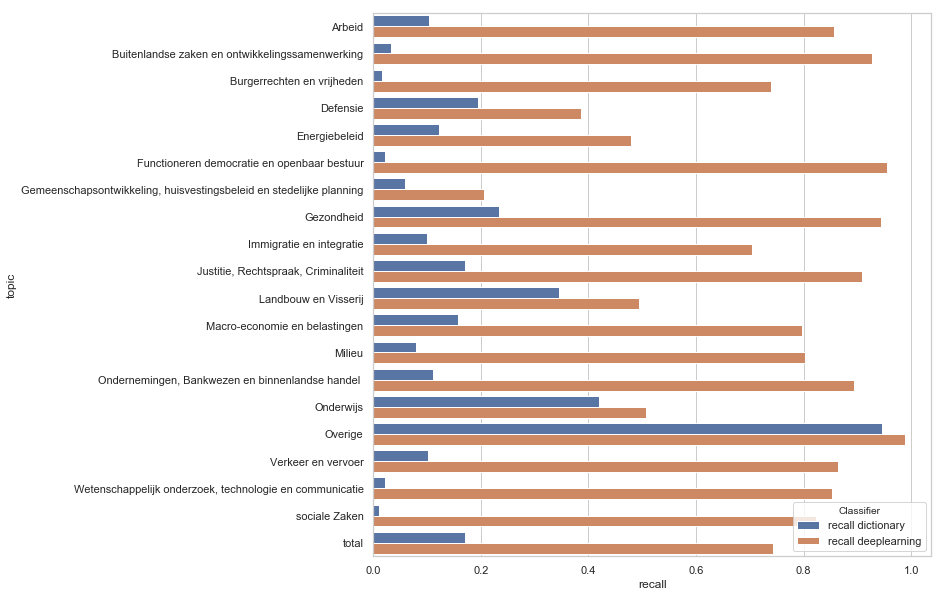

In [104]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,10))

sns.set(style="whitegrid")
ax = sns.barplot(y="topic", x= "recall", hue = "Classifier", data=d)

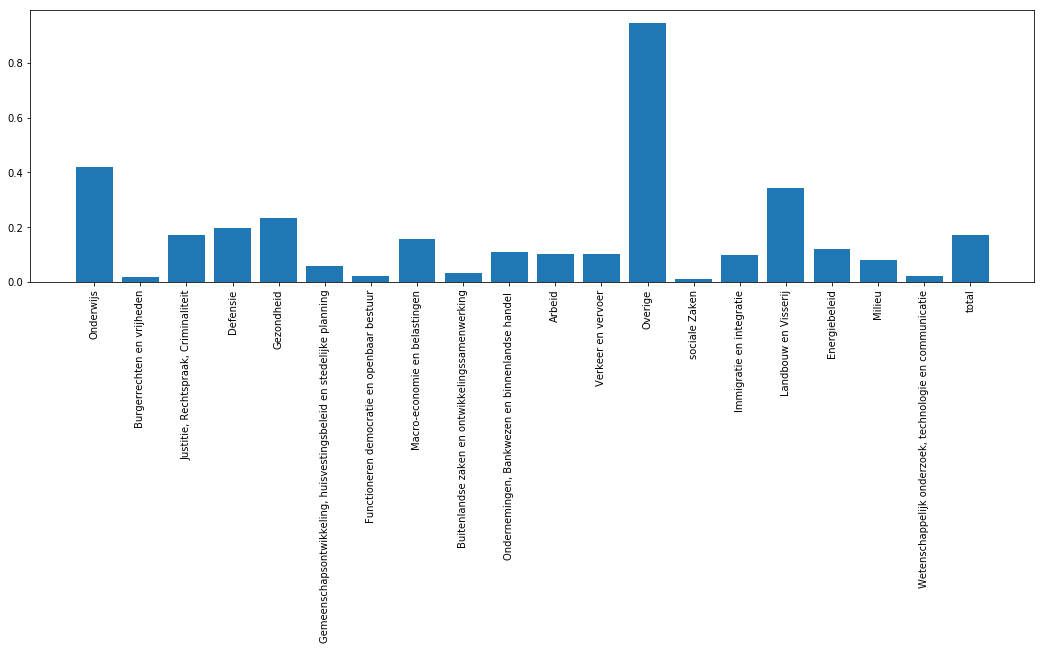

In [55]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(recall)), recall.values(), align="center")
plt.xticks(range(len(recall)), list(recall.keys()))
plt.xticks(rotation=90)
plt.show()


In [106]:
import pandas as pd
pd.__version__

'0.25.0'

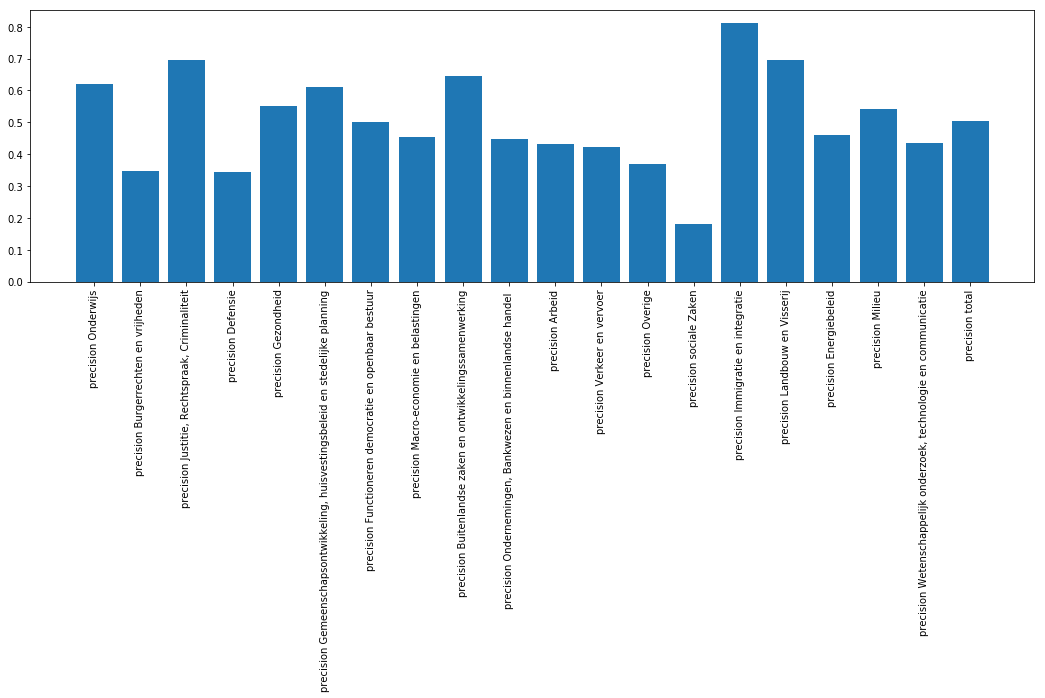

In [50]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(precision)), precision.values(), align="center")
plt.xticks(range(len(precision)), list(precision.keys()))
plt.xticks(rotation=90)
plt.show()


In [37]:
for t, s in recall.items():
    print('{} -- {}'.format(t, s))
    
print()

for t, s in precision.items():
    print('{} -- {}'.format(t, s))

print()

    
for t, s in recall_stemmed.items():
    print('{} -- {}'.format(t, s))
    
print()

for t, s in precision_stemmed.items():
    print('{} -- {}'.format(t, s))


recall Onderwijs -- 0.41901408450704225
recall Burgerrechten en vrijheden -- 0.017057569296375266
recall Justitie, Rechtspraak, Criminaliteit -- 0.17144808743169399
recall Defensie -- 0.19556451612903225
recall Gezondheid -- 0.2334293948126801
recall Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning -- 0.060109289617486336
recall Functioneren democratie en openbaar bestuur -- 0.02122347066167291
recall Macro-economie en belastingen -- 0.15767634854771784
recall Buitenlandse zaken en ontwikkelingssamenwerking -- 0.032357473035439135
recall Ondernemingen, Bankwezen en binnenlandse handel  -- 0.1109375
recall Arbeid -- 0.1038961038961039
recall Verkeer en vervoer -- 0.10266159695817491
recall Overige -- 0.9449177729344165
recall sociale Zaken -- 0.01
recall Immigratie en integratie -- 0.10038610038610038
recall Landbouw en Visserij -- 0.345
recall Energiebeleid -- 0.1223021582733813
recall Milieu -- 0.07936507936507936
recall Wetenschappelijk onderzoek, technologie en co